# MLB Data Analysis

As a baseball player and big US sports fan, I watch MLB baseball almost every day between march and October and never miss a Rockies Game !
After Machado/Harper massive contracts posted in 2019 I wanted to understand how MLB players salaries where related to offense performances and experience. 
In this Notebook I analyzed this relation for 2018 season by cross checking of 3 databases :
* Batting statistics  
* Player data  
* Salaries
  
I find out that the MLB player salary was more related with experience than HR and Average.
I also propose a new Score to rank MLB batters : "Versatility", that is proportional to the product of average, HR rate and RBI rate.

Language used : SQL and python (seaborn, pandas, scikit learn)

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSK7ZeLdkw99eXjQJeR13w3U7QN-FrE76kClHlE98tNZOCTyvyR&s">

# 1. Data Collection and Preparation

The data used in this notebook were dowloaded from Sean Lahman Website http://www.seanlahman.com/baseball-archive/statistics/
It contains data for seasons between 1971 and 2018 about players, managers and teams. It covers batting stats, pitching stats and it is possible to differenciate regular season stats from postseason stats.

The dataset features 28 CSV files I imported as SQL database in my IBM Cloud Storage using db2-mn service and SQL console. The following code was executed to create the necessary SQL tables :

CREATE TABLE MLB_BATTING(
    playerID VARCHAR(30),
    yearID INT,
    stint INT,
    teamID VARCHAR(5),
    lgID  VARCHAR(5),
    G INT,
    AB INT,
    R INT,
    H INT,
    H2B INT,
    H3B INT,
    HR INT,
    RBI INT,
    SB INT,
    CS INT,
    BB INT,
    SO INT,
    IBB INT,
    HBP INT,
    SH INT,
    SF INT,
    GIDP INT
)
;  
  
CREATE TABLE MLB_SALARIES(
    yearID INT,
    teamID VARCHAR(5),
    lgID VARCHAR(5),
    playerID VARCHAR(30),
    salary INT 
)
;  
  
CREATE TABLE MLB_PEOPLE(
    playerID VARCHAR(30),
    birthYear INT,
    birthMonth INT,
    birthDay INT,
    birthCountry VARCHAR(30),
    birthState VARCHAR(30),
    birthCity VARCHAR(60),
    deathYear INT,
    deathMonth INT,
    deathDay INT,
    deathCountry VARCHAR(30),
    deathState VARCHAR(30),
    deathCity VARCHAR(60),
    nameFirst VARCHAR(30),
    nameLast VARCHAR(30),
    nameGiven VARCHAR(60),
    weight INT,
    height INT,
    bats VARCHAR(2),
    throws VARCHAR(2),
    debut VARCHAR(12),
    finalGame VARCHAR(12),
    retroID VARCHAR(20),
    bbrefID VARCHAR(20)
)
;


# 2. Data Understanding

The database is accessed thanks to SQL magic commands. 

In [1]:
!pip install ipython-sql
%load_ext sql

In [3]:
# The code was removed by Watson Studio for sharing.

'Connected: tnx79613@BLUDB'

In [4]:
%sql select * FROM MLB_BATTING LIMIT 5

 * ibm_db_sa://tnx79613:***@dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net:50000/BLUDB
Done.


playerid,yearid,stint,teamid,lgid,g,ab,r,h,h2b,h3b,hr,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
abercda01,1871,1,TRO,NA,1,4,0,0,0,0,0,0,0,0,0,0,None,None,None,None,0
addybo01,1871,1,RC1,NA,25,118,30,32,6,0,0,13,8,1,4,0,None,None,None,None,0
allisar01,1871,1,CL1,NA,29,137,28,40,4,5,0,19,3,1,2,5,None,None,None,None,1
allisdo01,1871,1,WS3,NA,27,133,28,44,10,2,2,27,1,1,0,2,None,None,None,None,0
ansonca01,1871,1,RC1,NA,25,120,29,39,11,3,0,16,6,2,2,1,None,None,None,None,0


In [5]:
%sql select * FROM MLB_SALARIES LIMIT 5

 * ibm_db_sa://tnx79613:***@dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net:50000/BLUDB
Done.


yearid,teamid,lgid,playerid,salary
1985,ATL,NL,barkele01,870000
1985,ATL,NL,bedrost01,550000
1985,ATL,NL,benedbr01,545000
1985,ATL,NL,campri01,633333
1985,ATL,NL,ceronri01,625000


In [6]:
%sql select * FROM MLB_PEOPLE LIMIT 5

 * ibm_db_sa://tnx79613:***@dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net:50000/BLUDB
Done.


playerid,birthyear,birthmonth,birthday,birthcountry,birthstate,birthcity,deathyear,deathmonth,deathday,deathcountry,deathstate,deathcity,namefirst,namelast,namegiven,weight,height,bats,throws,debut,finalgame,retroid,bbrefid
aardsda01,1981,12,27,USA,CO,Denver,None,None,None,None,None,None,David,Aardsma,David Allan,215,75,R,R,2004-04-06,2015-08-23,aardd001,aardsda01
aaronha01,1934,2,5,USA,AL,Mobile,None,None,None,None,None,None,Hank,Aaron,Henry Louis,180,72,R,R,1954-04-13,1976-10-03,aaroh101,aaronha01
aaronto01,1939,8,5,USA,AL,Mobile,1984,8,16,USA,GA,Atlanta,Tommie,Aaron,Tommie Lee,190,75,R,R,1962-04-10,1971-09-26,aarot101,aaronto01
aasedo01,1954,9,8,USA,CA,Orange,None,None,None,None,None,None,Don,Aase,Donald William,190,75,R,R,1977-07-26,1990-10-03,aased001,aasedo01
abadan01,1972,8,25,USA,FL,Palm Beach,None,None,None,None,None,None,Andy,Abad,Fausto Andres,184,73,L,L,2001-09-10,2006-04-13,abada001,abadan01


# 3 Data Analysis

The data is analyzed through pandas DataFrames. 
We build a DataFrame aggregating the PEOPLE, BATTING and SALARIES tables thanks to SQL INNER JOIN on player and year ID. 
We only consider the 2018 season for this study. 
We only keep players with 81 games played in 2018 (half total season games)

We also build new columns :
* Experience = Number of full season played
* AVG = Number of Hits divided by number of At Bat
* HR/G = Number of HR divided by number of Games played
* RBI/G = Number of RBI divided by number of Game Played

To sort offensive production I propose a Criteria based on versatility. 
This score gives the same importance to AVG, HRs and RBIs.
I called it the FB_SCORE.

We draw the Correlation matrix of the new DataFrame to see which parameters is the most correlated to the Salary.
It appears that Experience has the highest correlation score.
It also appears that 
* a high RBI rate is more rewarded than a high HR rate
* a high HR rate is more rewarded than a high Batting average.
This is performed thanks to pandas corr() function and seaborn heatmap(). 

For further analysis we plot this influence thanks to seaborn scatter plot.

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
data = %sql SELECT MLB_BATTING.playerID,  MLB_BATTING.yearID,MLB_PEOPLE.debut, MLB_BATTING.yearID - CAST(substring(MLB_PEOPLE.debut,1,4) as int) as "Experience", CAST(CAST(MLB_BATTING.H as float) / CAST(MLB_BATTING.AB as float) as NUMERIC(4,3)) as "AVG", CAST(CAST(MLB_BATTING.HR as float)/ CAST(MLB_BATTING.AB as float) as NUMERIC(4,3)) as "HR/AB", CAST(CAST(MLB_BATTING.RBI as float)/ CAST(MLB_BATTING.AB as float) as NUMERIC(4,3)) as "RBI/AB", MLB_SALARIES.salary FROM (MLB_BATTING INNER JOIN MLB_SALARIES ON MLB_BATTING.playerID = MLB_SALARIES.playerID and MLB_BATTING.yearID = MLB_SALARIES.yearID) INNER JOIN MLB_PEOPLE ON MLB_PEOPLE.playerID = MLB_SALARIES.playerID WHERE MLB_BATTING.yearID = 2016 and MLB_BATTING.G > 81

 * ibm_db_sa://tnx79613:***@dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net:50000/BLUDB
Done.


In [12]:
df_data = data.DataFrame()
df_data.sort_values(by="salary",ascending=False).head(10)

,playerid,yearid,debut,Experience,AVG,HR/AB,RBI/AB,salary
34,cabremi01,2016,2003-06-20,13,0.315,0.063,0.181,28000000
47,cespeyo01,2016,2012-03-28,4,0.279,0.064,0.179,27328046
207,pujolal01,2016,2001-04-02,15,0.268,0.052,0.200,25000000
37,canoro01,2016,2005-05-03,11,0.297,0.059,0.157,24000000
77,fieldpr01,2016,2005-06-13,11,0.211,0.024,0.134,24000000
256,teixema01,2016,2003-04-01,13,0.204,0.038,0.113,23125000
163,mauerjo01,2016,2004-04-05,12,0.261,0.022,0.099,23000000
210,ramirha01,2016,2005-09-20,11,0.285,0.054,0.202,22750000
264,uptonju01,2016,2007-08-02,9,0.245,0.054,0.152,22125000
274,werthja01,2016,2002-09-01,14,0.243,0.040,0.131,21733615


 * ibm_db_sa://tnx79613:***@dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net:50000/BLUDB
Done.


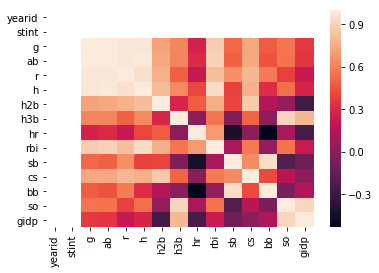

In [13]:
data_sql = %sql select * FROM MLB_BATTING LIMIT 5
df_b = data_sql.DataFrame()
df_b.head()
sns.heatmap(df_b.corr())

In [14]:
df_data["FB_SCORE"] = df_data["AVG"]*df_data["HR/AB"]*df_data["RBI/AB"]*100
df_data_s = df_data.sort_values(by="FB_SCORE",ascending=False)
df_data_s.head(15)

,playerid,yearid,debut,Experience,AVG,HR/AB,RBI/AB,salary,FB_SCORE
186,ortizda01,2016,1997-09-02,19,0.314,0.070,0.236,16000000,0.518728000
9,arenano01,2016,2013-04-28,3,0.294,0.066,0.215,5000000,0.417186000
28,bruceja01,2016,2008-05-27,8,0.264,0.067,0.216,12541666,0.382060800
72,encared01,2016,2005-06-24,11,0.262,0.069,0.211,10000000,0.381445800
251,storytr01,2016,2016-04-04,0,0.271,0.072,0.193,507500,0.376581600
55,cruzne02,2016,2005-09-17,11,0.286,0.073,0.178,14250000,0.371628400
34,cabremi01,2016,2003-06-20,13,0.315,0.063,0.181,28000000,0.359194500
260,trumbma01,2016,2010-09-11,6,0.256,0.076,0.176,9150000,0.342425600
57,daviskh01,2016,2013-04-01,3,0.246,0.075,0.183,524500,0.337635000
18,beltrca01,2016,1998-09-14,18,0.303,0.061,0.178,15000000,0.328997400


            yearid  Experience       AVG     HR/AB    RBI/AB    salary
yearid         NaN         NaN       NaN       NaN       NaN       NaN
Experience     NaN    1.000000  0.048799  0.108271  0.152014  0.685381
AVG            NaN    0.048799  1.000000  0.010370  0.203267  0.162473
HR/AB          NaN    0.108271  0.010370  1.000000  0.814182  0.229448
RBI/AB         NaN    0.152014  0.203267  0.814182  1.000000  0.279458
salary         NaN    0.685381  0.162473  0.229448  0.279458  1.000000


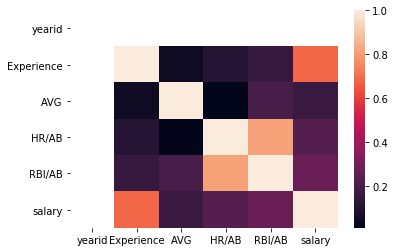

In [15]:
df_data_corr = df_data.copy()
df_data_corr["AVG"]= (df_data_corr["AVG"]*100).astype(int)
df_data_corr["HR/AB"]= (df_data_corr["HR/AB"]*100).astype(int)
df_data_corr["RBI/AB"]= (df_data_corr["RBI/AB"]*100).astype(int)
df_data_corr["Experience"]= (df_data_corr["Experience"]).astype(int)
a = df_data_corr.corr()
print(a)
sns.heatmap(a)

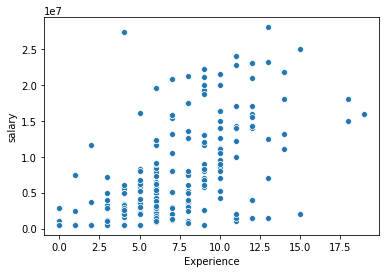

In [16]:
sns.scatterplot(x="Experience", y="salary", data=df_data)

In [ ]:
sns.scatterplot(x="HR/AB", y="salary", data=df_data)

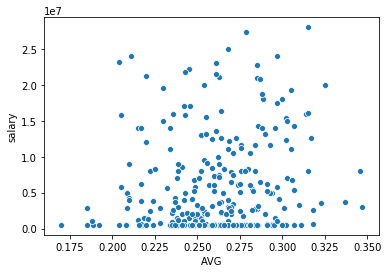

In [17]:
sns.scatterplot(x="AVG", y="salary", data=df_data)

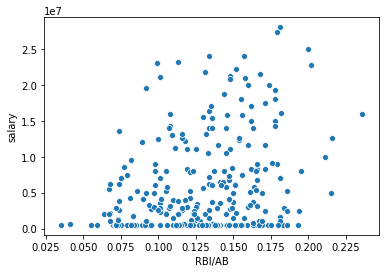

In [18]:
sns.scatterplot(x="RBI/AB", y="salary", data=df_data)

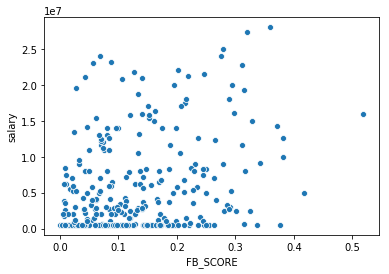

In [19]:
sns.scatterplot(x="FB_SCORE", y="salary", data=df_data)

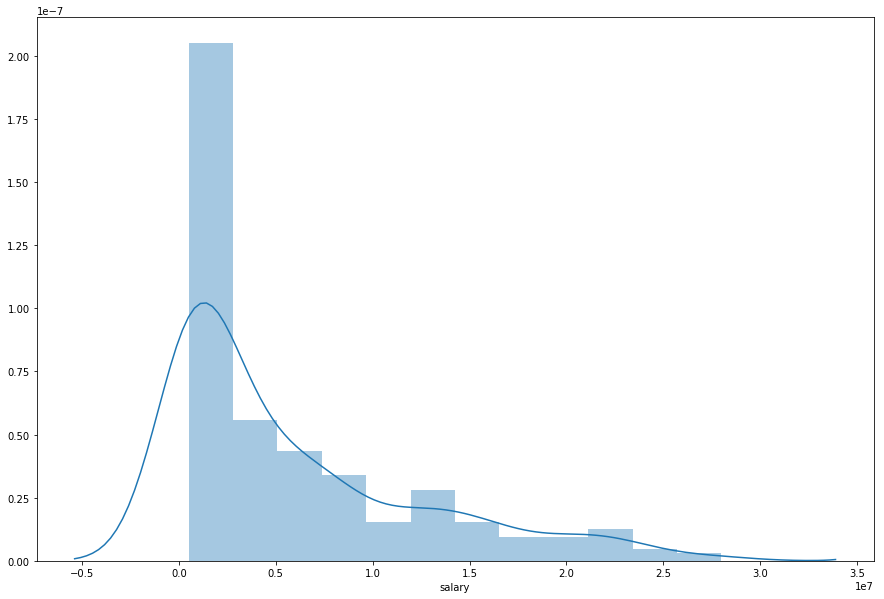

In [20]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(df_data['salary'])

# 4. Machine Learning

In this section we will try to predict the salary of a player based on his Experience, AVG, HR/G and RBI/G.
This will be performed by linear and polynomial mono and multivariable regression.

scikit learn machine learning library will be used.

R² and Mean Square error criterias will be used to evaluate the performance of the model.

It appears that :
* A 3rd order polynomial model based on Experience, AVG, HR/G and RBI/G can be used to predict MLB players salaries
* This type of model hardly reach a R² score higher than 0.6
* It is very hard to predict a MLB player salary based on its performances and experience only. 

It is mainly due to the fact that many other parameters are influencing this salary :
* the player is the face of a franchise
* the player signing timing is primordial
* the player defensive statistics matters
* the player has a big social media influence ...



In [21]:
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

In [23]:
X = df_data[['Experience','AVG','HR/AB','RBI/AB']].values
Y = df_data['salary'].values
reg_sal = linear_model.LinearRegression()
reg_sal.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [30]:
reg_sal = linear_model.LinearRegression()
reg_sal.fit(X,Y)
print(reg_sal.coef_)
r2_score(Y,Y_pred)

[ 1123297.75832717 23290407.75265728 32386829.09642928 15755190.02725266]


0.5129649203577651

In [32]:
X_exp = df_data[['Experience']].values
reg_sal_exp = linear_model.LinearRegression()
reg_sal_exp.fit(X_exp,Y)
Y_pred_exp = reg_sal_exp.predict(X_exp)
print(reg_sal_exp.coef_)
r2_score(Y,Y_pred_exp)

[1169470.1788028]


0.46974704862519445

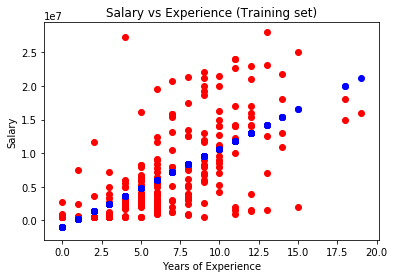

In [33]:
plt.scatter(X_exp, Y, color = 'red')
plt.scatter(X_exp, Y_pred_exp, color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [34]:
poly = PolynomialFeatures(3)
X_exp_poly = poly.fit_transform(X_exp)
reg_poly = linear_model.LinearRegression()
reg_poly.fit(X_exp_poly,Y)
Y_pred_exp_pol = reg_poly.predict(X_exp_poly)
r2_score(Y,Y_pred_exp_pol)

0.48222932565617815

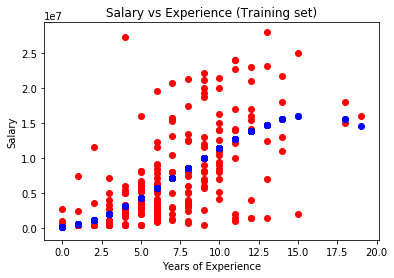

In [35]:
plt.scatter(X_exp, Y, color = 'red')
plt.scatter(X_exp, Y_pred_exp_pol, color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [36]:
reg_sal = linear_model.LinearRegression()
reg_sal.fit(X,Y)

poly2 = PolynomialFeatures(3)
X_poly2 = poly2.fit_transform(X)
reg_poly2 = linear_model.LinearRegression()
reg_poly2.fit(X_poly2,Y)
Y_pred_pol2 = reg_poly2.predict(X_poly2)
r2_score(Y,Y_pred_pol2)

0.5942514495885265

In [40]:
Y_pred_pol2 = Y_pred_pol2.astype(int)
df_res = pd.DataFrame(Y_pred_pol2, columns=["predicted salary"])
df_data_comp = df_data;
df_data_comp["prediction"] =df_res
df_data_comp.head()

,playerid,yearid,debut,Experience,AVG,HR/AB,RBI/AB,salary,FB_SCORE,prediction
0,abreujo02,2016,2014-03-31,2,0.293,0.040,0.160,11666667,0.187520000,1558866
1,adamecr01,2016,2014-07-29,2,0.217,0.008,0.075,509500,0.013020000,774306
2,adamsma01,2016,2012-05-20,4,0.249,0.053,0.181,1650000,0.238865700,3278760
3,ahmedni01,2016,2014-06-29,2,0.218,0.014,0.070,521600,0.021364000,377880
4,alonsyo01,2016,2010-09-01,6,0.253,0.014,0.116,2650000,0.041087200,4346526
